На основе данных о продажах игр, оценках пользователей и экспертов, жанрах и платформах поведем исследование рынка компьютерных игр.  

Цель исследования — выявление определяющих успешность игры закономерностей

Данные о поведении пользователей получены из ткрытых источников и представленны в файле games.csv.

Исследование пройдёт в четыре этапа: 
- Обзор данных. 
- Предобработка данных. 
- Проведение исследовательского анализа данных. 
- Проверка статистических гипотез

###  Откроем файл с данными и изучим общую информацию

In [3]:
# импортируем библиотеки и загрузим датасет
# рассмотрим первые 5 строк таблицы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

try:
    data=pd.read_csv('/datasets/games.csv')
except:
    data=pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Рассмотрим общую информацию о датасете

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


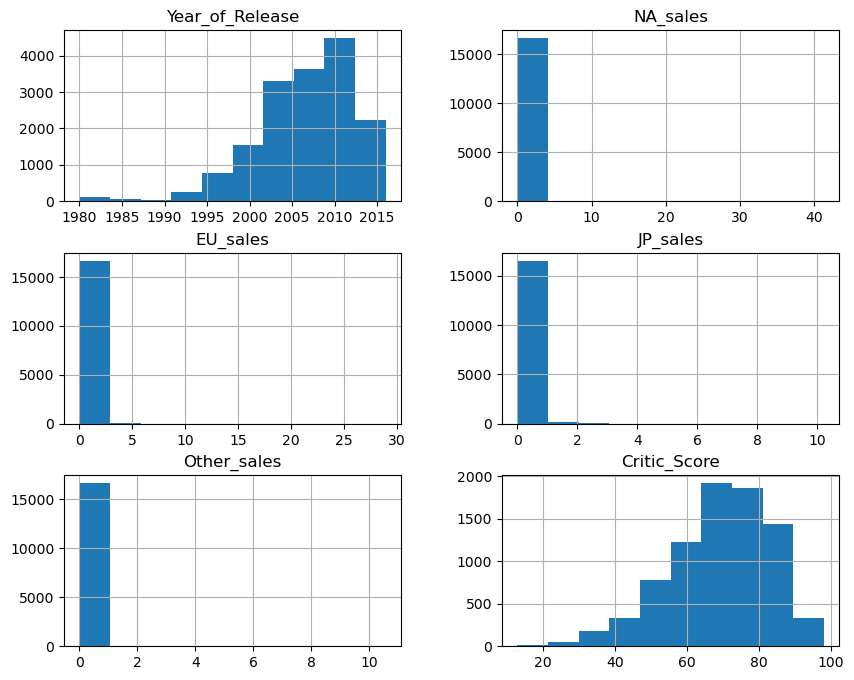

In [5]:
data.hist(figsize=(10, 8));

In [6]:
# Оценим полноту данных
pd.DataFrame(round(data.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,1.600000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.300000
User_Score,40.100000


Проверим на наличие явных дубликатов

In [7]:
data.duplicated().sum()

0

Вывод: В датасете 16 715 строк и 11 столбцов. В некоторых столбцах пропущенные значения достигают 51%. ряд столбцов содержит некорректный тип данных. Наименования столбцов для удобства следует привести к нижнему регистру.

### Предобработка данных

Заменим названия столбцов и приведем их к нижнему регистру.

In [8]:
#переименование колонок (исправление стиля)
data.columns = data.columns.map(lambda x: x.lower())

#проверим внесение изменений:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [9]:
#чтобы избежать повторяющихся действий создадим функцию для описания столбцов
def description(column):
    print('наименование столбца:',column)
    print('тип данных:', data[column].dtypes)
    print('пропущенно значений:',data[column].isna().sum())
    if data[column].dtypes == 'object':
        print('уникальные значения:', '\n', data[column].value_counts())
    else:
        print('минимальное значение:',data[column].min())
        print('максимальное значение:', data[column].max())

Вначале оценим столбец с названиями игр (name)

In [10]:
description('name')

наименование столбца: name
тип данных: object
пропущенно значений: 2
уникальные значения: 
 Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64


Пропущенно всего 2 значения. 

In [11]:
# Удаляем записи, где отсутствует название игры (невозможно востановить данную информацию)
data.dropna(subset=['name'], inplace=True)
# контрольная проверка наличия пропусков в столбце
data['name'].isnull().sum()

0

Рассмотрим столбец с указанием платформы (platform)

In [12]:
description('platform')

наименование столбца: platform
тип данных: object
пропущенно значений: 0
уникальные значения: 
 PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64


Пропущенных значений нет. Возникли сомнения в правильности записи наименования платформы '2600'. Поиск информации показал, что это не опечатка а сокращенное наименование 'Atari 2600' (популярная с 1977 по 1990 приставка)

Рассмотрим столбец с указанием года выхода (year_of_release)

In [13]:
description('year_of_release')

наименование столбца: year_of_release
тип данных: float64
пропущенно значений: 269
минимальное значение: 1980.0
максимальное значение: 2016.0


In [14]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [15]:
# Приводим в целочисленный тип год выхода игры
# Удалим попущенные значения
data.dropna(subset=['year_of_release'], inplace=True)
data['year_of_release'] = data['year_of_release'].astype(int)

# Проверим 
data['year_of_release'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Рассмотрим столбец с указанием жанра (genre)

In [16]:
description('genre')

наименование столбца: genre
тип данных: object
пропущенно значений: 0
уникальные значения: 
 Action          3307
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64


Рассмотрим столбцы по продажам(na_sales,eu_sales,jp_sales,other_sales )
Данные записанны в миллионах проданных копий

In [17]:
description('na_sales')
print('-'* 30)
description('eu_sales')
print('-'* 30)
description('jp_sales')
print('-'* 30)
description('other_sales')

наименование столбца: na_sales
тип данных: float64
пропущенно значений: 0
минимальное значение: 0.0
максимальное значение: 41.36
------------------------------
наименование столбца: eu_sales
тип данных: float64
пропущенно значений: 0
минимальное значение: 0.0
максимальное значение: 28.96
------------------------------
наименование столбца: jp_sales
тип данных: float64
пропущенно значений: 0
минимальное значение: 0.0
максимальное значение: 10.22
------------------------------
наименование столбца: other_sales
тип данных: float64
пропущенно значений: 0
минимальное значение: 0.0
максимальное значение: 10.57


Рассмотрим оценки критиков и игроков (critic_score, user_score)

In [18]:
description('critic_score')
print('-'* 30)
description('user_score')

наименование столбца: critic_score
тип данных: float64
пропущенно значений: 8461
минимальное значение: 13.0
максимальное значение: 98.0
------------------------------
наименование столбца: user_score
тип данных: object
пропущенно значений: 6605
уникальные значения: 
 tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64


В оценках критиков мы видим 8 461 пропуск. Это может быть вызванно не правильной загрузкой данных или тем, что игра относительно новая и еще не успела получить оценку.

В оценках пользлвателей мы видим необычный показатель tbd "будет определено позже". Также необходимо изменить тип данных на float.

In [19]:
# заменим tbd на nan.
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan
# Изменим тип данных на float
data['user_score'] = data['user_score'].astype('float')
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Мы не стали удалять пропущенные значения, т.к. они составляют практически половину датасета и это может сильно исказить другие вычисления.

Рассмотрим столбец с обозначением рейтинга от организации ESRB (rating)

In [20]:
description('rating')

наименование столбца: rating
тип данных: object
пропущенно значений: 6676
уникальные значения: 
 E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64


Рейтинг К-А присваивали играм, содержащим контент, подходящий для широкой аудитории. Этот рейтинг использовался до 1998 года, когда он был переименован в E. Заменим значение К-А на Е для единообразия.

In [21]:
data['rating']= data['rating'].str.replace('K-A', 'E')
# проверка
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

Мы видим 6676 пропусков. Возможно это данные по играм выпущенным до 1994 года (год создания рейтингового агентства).

In [22]:
data.groupby(['year_of_release'])['rating'].count()

year_of_release
1980       0
1981       0
1982       0
1983       0
1984       0
1985       1
1986       0
1987       0
1988       1
1989       0
1990       0
1991       0
1992       2
1993       0
1994       1
1995       0
1996       7
1997      19
1998      32
1999      42
2000     148
2001     339
2002     655
2003     613
2004     598
2005     706
2006     678
2007     821
2008     981
2009    1011
2010     799
2011     703
2012     355
2013     316
2014     345
2015     315
2016     280
Name: rating, dtype: int64

Расчитаем суммарные продажи во всех регионах и запишим их в отдельный столбец.

In [23]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
# проверка
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Вывод: Наименования солбцов были приведены к нижнему регистру. Из столбцов с наименованиями и годом выпуска были удалены строки, т.к. эти данные невозможно востановить. Пропуски в других столбцах не привели к удалению строк,но и не были заполненны т.к. это может повлечь за собой некорректные расчеты. Создан  дополнительный столбец с суммарными продажами по всем регионам. Все данные приведены к удобным для работы форматам.

### Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. 

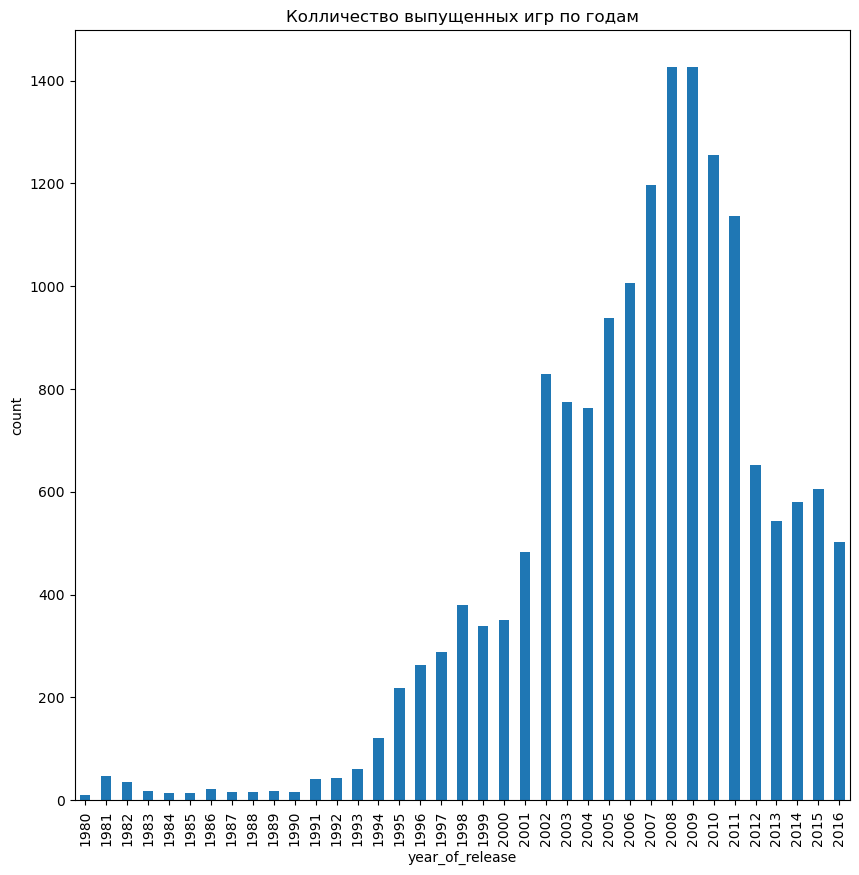

In [24]:
data.groupby(by='year_of_release')['year_of_release'].count().plot(kind='bar', 
                                                                   ylabel = 'count', 
                                                                   title='Колличество выпущенных игр по годам',
                                                                   figsize=(10,10));

Можно отметить резкие скачки в 1994, а затем в 2002 году. А уже с 2010 наблюдется устойчивый спад, в колличестве выпускаемых игр.
Такм образом данные до 1994 года можно отбросить. Наибольший интерес для нас будут представялять игры выпущенные с 2007 (год пика выпуска игр), до 2016 соответсвенно.

Рассмотрим, как менялись продажи по платформам.

In [25]:
data.head(1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54


Выберем платформы с наибольшими суммарными продажами.

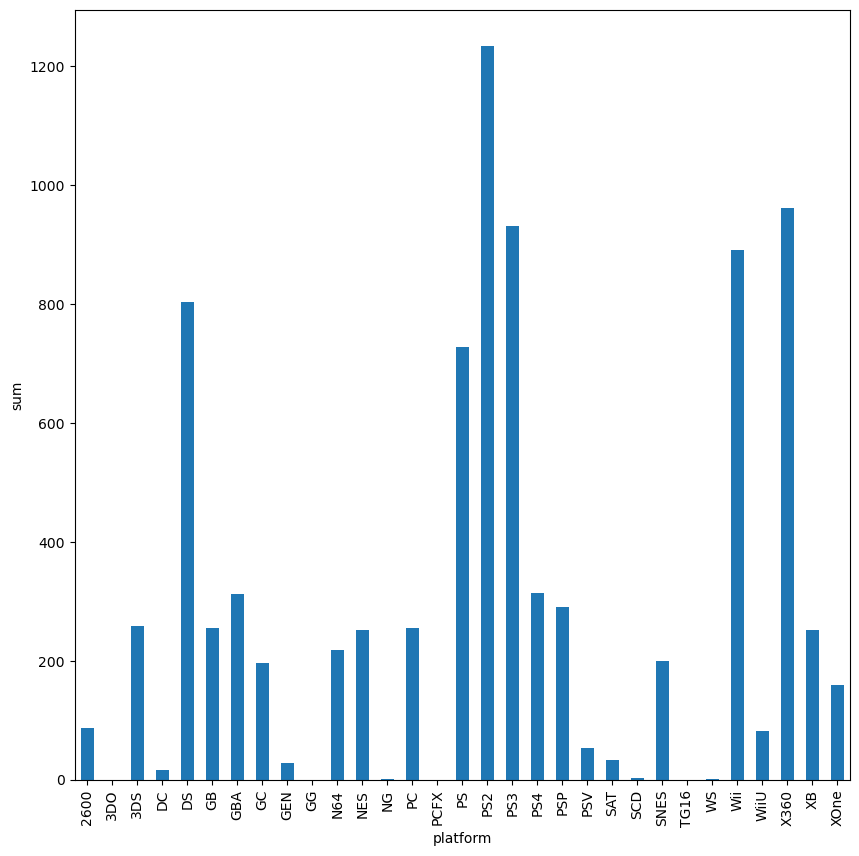

In [26]:
data.groupby(by='platform')['total_sales'].sum().plot(kind='bar', ylabel = 'sum', figsize=(10,10));

In [27]:
(
    data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending = False)
)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Исходя из иформации представленно на графике, можно выделить Топ-10 наиболее популярных платформ.

Топ-6:
- PS2
- X360
- PS3
- Wii
- DS
- PS
- PS4
- GBA
- PSP
- 3DS

Построим распределение по годам для топ-6 платформ. 

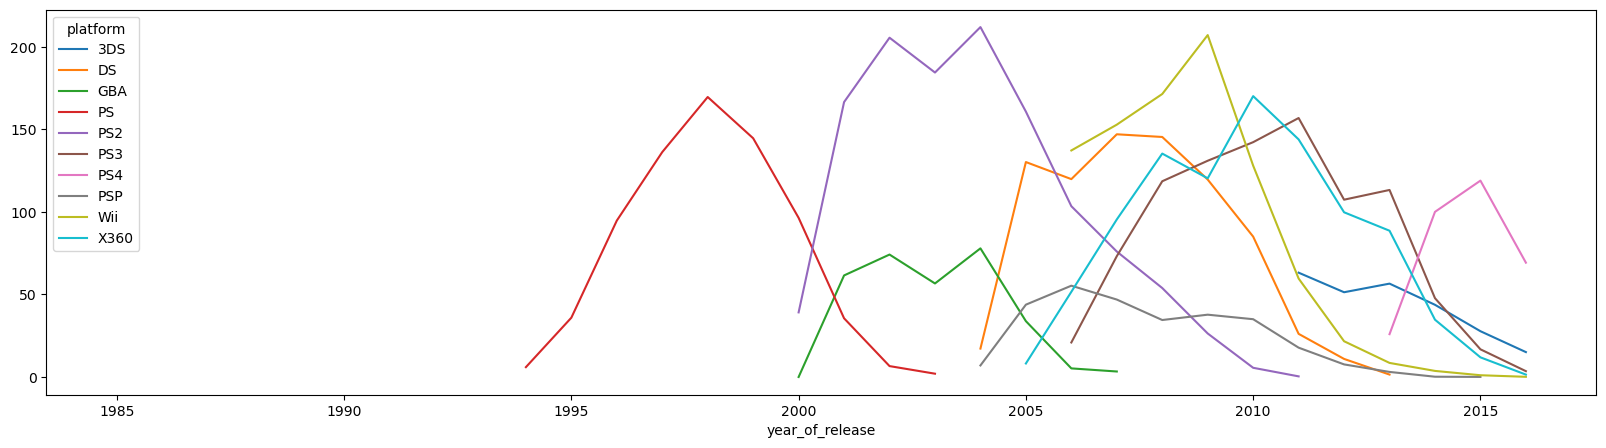

In [33]:
top_p = data.groupby('platform').sum()['total_sales'].sort_values(ascending=False).index.values[:10]

popular_p = data[data.platform.isin(top_p)]
popular_p = popular_p.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
popular_p.plot(figsize=(20,5));

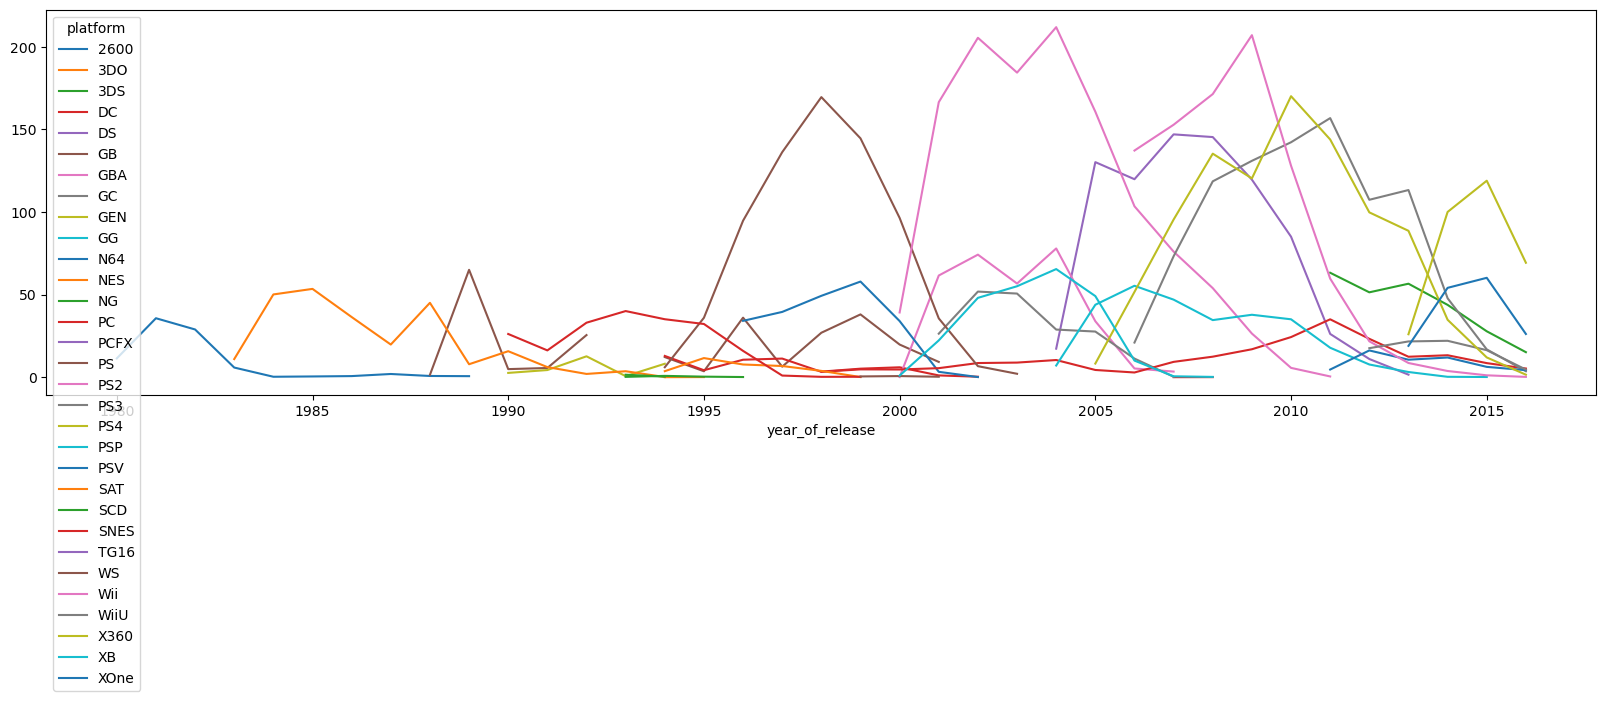

In [34]:
top_p = data.groupby('platform').sum()['total_sales'].sort_values(ascending=False).index

popular_p = data[data.platform.isin(top_p)]
popular_p = popular_p.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
popular_p.plot(figsize=(20,5));

Вывод: За какой характерный срок появляются новые и исчезают старые платформы?

  
Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы. 

ОБРАЗАТЬ ДАТАСЕТ С 2007 года

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверьте гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.


Шаг 6. Напишите общий вывод